# Overview

This analysis is intended to guide the Microsoft movie studio in its decision regarding which types of films to produce. The purpose of this analysis is to identify which kinds of movies are high-performers, and the extent to which performance depends on a film's production budget. A film's performance will be determined with respect to two main categories: financial performance and ratings. 


##
---

# Business Problem

This analysis addresses the following questions:

> *1. Which genres of film perform the best financially?*   

> *2. Which genres of film have the highest ratings?*   

> *3. Does a film's financial performance and/or ratings depend on its production budget?*


In the context of this analysis, a film's financial performance measures how profitable it is by accounting for: *gross income*, *production budget*, *net income*, and *efficiency (cost-to-income ratio)*. On the other hand, a film's ratings are determined via *average user ratings in datasets extracted from the IMDb (International Movie Database) and TMDb (The Movie Database)*.

The first two questions in this analysis are answered based on the premise that *genre* is a category by which movies should be distinguished when analyzing performance. An analysis which does not account for genre ignores the fact that different genres appeal to different demographics, and it follows that insights into movie performance gained from such an analysis will be misleading. In addition, due to differences in popularity of each genre, the average production budget is not the same across genres. However, this does not entirely preclude low financial performance or low ratings. For example, a given genre could have a lower average net income than some other genre, but have a higher gain per dolar spen on production (lower cost-to-income ratio) and better average rating. Therefore, all performance analysis is carried out on data grouped by genre. 

As for the last question, the effect of production budget on performance should not depend on a film's genre. Common sense tells us that a higher production budget should lead to better results for a film, regardless of its genre. Therefore, the data is not grouped by genre during this part of the analysis.


##
---

# Data Overview

The data used for this analysis is a collection of CSV files located in the [project_files/data](./dsc-phase1-project-template.ipynb) subdirectory.

The `imdb.title.basics.csv` dataset assigns a unique movie ID to over 140,000 films, in addition to listing their title, year of release, runtime, and genres. After the column containing movie runtimes was discarded, this dataset was used to create the `titleyear_to_id_map` and `id_to_genre_map` DataFrames --`titleyear_to_id_map` is a  a table by which the `title` + `year` of a movie in a DataFrame without unique identifiers was mapped to its *IMDb*-designated ID  and `id_to_genre_map` is a table by which each movie ID is mapped to a list containing its associated genres.

The `imdb.title.ratings.csv` and `tmdb.movies.csv` files contains data from which the *IMDb* average rating and *TMDb* average rating were obtained for each movie ID. Both files contain a data column indicating the number of votes behind each average rating, which was used to filter out average ratings (by requiring an average rating to have at least 10 votes). This column was then discarded after the filtering was complete.

Finally, the `tn.movie_budgets.csv` dataset was the source of all financial data used in the analysis. It contains the production budget and gross income (both domestic and worldwide) of over 5,000 films. The worldwide gross income was taken as the total gross income for each film, and the column listing domestic gross incomes was discarded.

##
---

# Methods

## *Data Preparation*

While addressing Questions 1 and 2, datasets that did not have a column listing *IMDb* movie ID's (i.e. datasets not sourced from *IMDb*) were first re-indexed by movie `title` + `year`, and then  joined with the `titleyear_to_id_map` DataFrame. This process allowed the *IMDb* movie ID's to be mapped onto all other datasets. This process, in turn, allowed the genres associated with each movie ID to be mapped onto these datasets by performing another join with the `id_to_genre_map` DataFrame. 

Furthermore, while addressing Question 3, the `id_to_financials_map`, `id_to_tmdb_rating_map`, and `id_to_imdb_rating_map` DataFrames (the cleaned versions of `tn.movie_budgets.csv`, `tmdb.movies.csv`, and `imdb.title.ratings.csv` respectively) were used to map production_budget, gross income, net income, cost-to-income ratio, *TMDb* average rating, and *IMDb* average rating to their associated movie ID.

##
---

## *Descriptive Analysis*

With respect to Question 1, three boxplots were created to illustrate the distributions of gross income, net income, and cost-to-income ratio by genre. A bosplot was used rather than a bar chart to highlight the spread of each feature's distribution. In addition, the median had to be used as a measure of cenral tendency for these features because they were all highly skewed.

For Question 2, two bar charts were made depicting the *TMBd* and *IMBd* mean average rating by genre. The mean was used here because both ratings were distributed normally for all genres.

As for Question 3, four linear regression plots were created to depict the correlation of production budget with gross income, net income,  *TMDb* average rating, and *IMDb* average rating. The cost-to-income ratio feature was omitted because it contained a large number of outliers and did not produce a meaningful regression plot.

##
---

# Data Preparation

---

## 0.1 - Importing the Required Modules

In [415]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

##
---

## 0.2 - Importing and Cleaning the Dataset in `imdb.title.basics.csv`

### 0.2.1 - Import the Dataset in `imbd.title.basics`

In [416]:
imdb_titles_df = pd.read_csv("data/imdb.title.basics.csv")

### 0.2.2 - Drop the Unnecessary Columns in `imdb_titles_df`

In [417]:
imdb_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [418]:
imdb_titles_df.drop(["original_title", "runtime_minutes"], axis=1, inplace=True)

In [419]:
imdb_titles_df.columns

Index(['tconst', 'primary_title', 'start_year', 'genres'], dtype='object')

### 0.2.3 - Rename the Relevant Columns in `imdb_titles_df`

In [420]:
imdb_titles_df.rename(columns={"tconst": "movie_ID", "primary_title": "title", "start_year": "year"}, inplace=True)

In [421]:
imdb_titles_df.columns

Index(['movie_ID', 'title', 'year', 'genres'], dtype='object')

### 0.2.4 - Drop Rows Containing Null Values in `imdb_titles_df`

In [422]:
imdb_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   movie_ID  146144 non-null  object
 1   title     146144 non-null  object
 2   year      146144 non-null  int64 
 3   genres    140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.5+ MB


In [423]:
imdb_titles_df.dropna(inplace=True)

In [424]:
imdb_titles_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140736 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   movie_ID  140736 non-null  object
 1   title     140736 non-null  object
 2   year      140736 non-null  int64 
 3   genres    140736 non-null  object
dtypes: int64(1), object(3)
memory usage: 5.4+ MB


### 0.2.5 - Convert Entries in the `genre` Column from Strings to Arrays

In [425]:
imdb_titles_df["genres"]

0            Action,Crime,Drama
1               Biography,Drama
2                         Drama
3                  Comedy,Drama
4          Comedy,Drama,Fantasy
                  ...          
146138    Adventure,History,War
146139                    Drama
146140              Documentary
146141                   Comedy
146143              Documentary
Name: genres, Length: 140736, dtype: object

In [426]:
imdb_titles_df["genres"] = imdb_titles_df["genres"].str.split(',')

In [427]:
imdb_titles_df["genres"]

0            [Action, Crime, Drama]
1                [Biography, Drama]
2                           [Drama]
3                   [Comedy, Drama]
4          [Comedy, Drama, Fantasy]
                    ...            
146138    [Adventure, History, War]
146139                      [Drama]
146140                [Documentary]
146141                     [Comedy]
146143                [Documentary]
Name: genres, Length: 140736, dtype: object

### 0.2.6 - View the Cleaned `imdb_titles_df` DataFrame

In [428]:
imdb_titles_df.head()

,movie_ID,title,year,genres
0,tt0063540,Sunghursh,2013,"[Action, Crime, Drama]"
1,tt0066787,One Day Before the Rainy Season,2019,"[Biography, Drama]"
2,tt0069049,The Other Side of the Wind,2018,[Drama]
3,tt0069204,Sabse Bada Sukh,2018,"[Comedy, Drama]"
4,tt0100275,The Wandering Soap Opera,2017,"[Comedy, Drama, Fantasy]"


##
---

## 0.3 - Creating a DataFrame (`id_to_genre_map`) that Maps *Movie ID* to *Genres*

### 0.3.1 - Initialize `id_to_genre_map` by Slicing from the `imbd_titles_df` DataFrame

In [429]:
id_to_genre_map = imdb_titles_df.loc[:, ["movie_ID", "genres"]]

In [430]:
id_to_genre_map.head()

,movie_ID,genres
0,tt0063540,"[Action, Crime, Drama]"
1,tt0066787,"[Biography, Drama]"
2,tt0069049,[Drama]
3,tt0069204,"[Comedy, Drama]"
4,tt0100275,"[Comedy, Drama, Fantasy]"


### 0.3.2 - Set the `movie_ID` Column as the Index of `id_to_genre_map`

In [431]:
id_to_genre_map.set_index("movie_ID", inplace=True)

In [432]:
id_to_genre_map.head()

,genres
movie_ID,
tt0063540,"[Action, Crime, Drama]"
tt0066787,"[Biography, Drama]"
tt0069049,[Drama]
tt0069204,"[Comedy, Drama]"
tt0100275,"[Comedy, Drama, Fantasy]"


### 0.3.3 - Extract the Individual Genres in `id_to_genre_map[genres]` into Their Own Dedicated Columns

In [433]:
id_to_genre_map["genre_1"] = id_to_genre_map["genres"].map(lambda x: x[0])
id_to_genre_map["genre_2"] = id_to_genre_map["genres"].map(lambda x: x[1] if len(x) > 1 else None)
id_to_genre_map["genre_3"] = id_to_genre_map["genres"].map(lambda x: x[2] if len(x) > 2 else None)

In [434]:
id_to_genre_map.head()

,genres,genre_1,genre_2,genre_3
movie_ID,,,,
tt0063540,"[Action, Crime, Drama]",Action,Crime,Drama
tt0066787,"[Biography, Drama]",Biography,Drama,None
tt0069049,[Drama],Drama,None,None
tt0069204,"[Comedy, Drama]",Comedy,Drama,None
tt0100275,"[Comedy, Drama, Fantasy]",Comedy,Drama,Fantasy


### 0.3.4 - Drop the `genres` Column in `id_to_genre_map`

In [435]:
id_to_genre_map.drop(columns="genres", inplace=True)

In [436]:
id_to_genre_map.head()

,genre_1,genre_2,genre_3
movie_ID,,,
tt0063540,Action,Crime,Drama
tt0066787,Biography,Drama,None
tt0069049,Drama,None,None
tt0069204,Comedy,Drama,None
tt0100275,Comedy,Drama,Fantasy


##
---

## 0.4 - Creating a DataFrame (`titleyear_to_id_map`) that Maps *Movie Title* and *Year of Release* to *Movie ID* 

### 0.4.1 - Initialize `titleyear_to_id_map` by Slicing from the `imbd_titles_df` DataFrame

In [437]:
titleyear_to_id_map = imdb_titles_df.loc[:, ["movie_ID", "title", "year"]]

In [438]:
titleyear_to_id_map.head()

,movie_ID,title,year
0,tt0063540,Sunghursh,2013
1,tt0066787,One Day Before the Rainy Season,2019
2,tt0069049,The Other Side of the Wind,2018
3,tt0069204,Sabse Bada Sukh,2018
4,tt0100275,The Wandering Soap Opera,2017


### 0.4.2 - Set the `title` and `year` Columns as the Index of `titleyear_to_id_map`

In [439]:
titleyear_to_id_map.set_index(["title", "year"], inplace=True)

In [440]:
titleyear_to_id_map.head()

,,movie_ID
title,year,
Sunghursh,2013,tt0063540
One Day Before the Rainy Season,2019,tt0066787
The Other Side of the Wind,2018,tt0069049
Sabse Bada Sukh,2018,tt0069204
The Wandering Soap Opera,2017,tt0100275


##
---

## 0.5 - Importing and Cleaning the Dataset in `tn.movie_budgets.csv`

### 0.5.1 - Import the Dataset in `tn.movie_budgets.csv`

In [441]:
tn_movie_budgets_df = pd.read_csv("data/tn.movie_budgets.csv")

In [442]:
tn_movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### 0.5.2 - Drop the Unnecessary Columns from `tn.movie_budgets.csv`

In [443]:
tn_movie_budgets_df.drop(["id", "domestic_gross"], axis=1, inplace=True)

In [444]:
tn_movie_budgets_df.head()

,release_date,movie,production_budget,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747"


### 0.5.3 - Discard the Day and Month of each Date in the `release_date` Column

In [445]:
tn_movie_budgets_df["release_date"].head()

0    Dec 18, 2009
1    May 20, 2011
2     Jun 7, 2019
3     May 1, 2015
4    Dec 15, 2017
Name: release_date, dtype: object

In [446]:
tn_movie_budgets_df["release_date"] = tn_movie_budgets_df["release_date"].str.split(' ').map(lambda x: int(x[-1]))

In [447]:
tn_movie_budgets_df["release_date"].head()

0    2009
1    2011
2    2019
3    2015
4    2017
Name: release_date, dtype: int64

### 0.5.4 - Rename the Relevant Columns of `tn.movie_budgets.csv`

In [448]:
tn_movie_budgets_df.columns

Index(['release_date', 'movie', 'production_budget', 'worldwide_gross'], dtype='object')

In [449]:
tn_movie_budgets_df.rename(columns={"release_date": "year", "movie": "title", "worldwide_gross": "gross_income"}, inplace=True)

In [450]:
tn_movie_budgets_df.columns

Index(['year', 'title', 'production_budget', 'gross_income'], dtype='object')

### 0.5.5 - Reformat the Entries in the `production_budget` and `gross_income` Columns as Integers

In [451]:
tn_movie_budgets_df[["production_budget", "gross_income"]]

,production_budget,gross_income
0,"$425,000,000","$2,776,345,279"
1,"$410,600,000","$1,045,663,875"
2,"$350,000,000","$149,762,350"
3,"$330,600,000","$1,403,013,963"
4,"$317,000,000","$1,316,721,747"
...,...,...
5777,"$7,000",$0
5778,"$6,000","$240,495"
5779,"$5,000","$1,338"
5780,"$1,400",$0


In [452]:
tn_movie_budgets_df[["production_budget", "gross_income"]].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   production_budget  5782 non-null   object
 1   gross_income       5782 non-null   object
dtypes: object(2)
memory usage: 90.5+ KB


In [453]:
tn_movie_budgets_df["production_budget"] = tn_movie_budgets_df["production_budget"].str.replace("[$,]", '', regex=True).map(lambda x: int(x))
tn_movie_budgets_df["gross_income"] = tn_movie_budgets_df["gross_income"].str.replace("[$,]", '', regex=True).map(lambda x: int(x))

In [454]:
tn_movie_budgets_df[["production_budget", "gross_income"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   production_budget  5782 non-null   int64
 1   gross_income       5782 non-null   int64
dtypes: int64(2)
memory usage: 90.5 KB


### 0.5.6 - Drop Rows with a Null Value in the `production_budget` or `gross_income` Column

In [455]:
print(0 in tn_movie_budgets_df["production_budget"].unique())
print(0 in tn_movie_budgets_df["gross_income"].unique())

False
True


In [456]:
tn_movie_budgets_df["gross_income"].value_counts()[0]

367

In [457]:
tn_movie_budgets_df = tn_movie_budgets_df[tn_movie_budgets_df["gross_income"] > 0]

In [458]:
print(0 in tn_movie_budgets_df["gross_income"].unique())

False


##
---

## 0.6 - Creating a DataFrame (`id_to_financials_map`) that Maps *Movie ID* to *Production Budget*, *Gross Income*, *Net Income*, and *Cost-to-Income Ratio*

### 0.6.1 - Set the `title` and `year` Columns as the Index of `tn_movie_budgets_df`

In [459]:
tn_movie_budgets_df.set_index(["title", "year"], inplace=True)

In [460]:
tn_movie_budgets_df.head()

,,production_budget,gross_income
title,year,,
Avatar,2009,425000000,2776345279
Pirates of the Caribbean: On Stranger Tides,2011,410600000,1045663875
Dark Phoenix,2019,350000000,149762350
Avengers: Age of Ultron,2015,330600000,1403013963
Star Wars Ep. VIII: The Last Jedi,2017,317000000,1316721747


### 0.6.2 - Append the Column with the Associated *Movie ID*  for each *Title* and *Year of Release* by Joining `titleyear_to_id_map` with `tn_movie_budgets_df`

In [461]:
tn_movie_budgets_df = tn_movie_budgets_df.join(titleyear_to_id_map, how='inner')

In [462]:
tn_movie_budgets_df.head()

,,production_budget,gross_income,movie_ID
title,year,,,
10 Cloverfield Lane,2016,5000000,108286422,tt1179933
10 Days in a Madhouse,2015,12000000,14616,tt3453052
12 Strong,2018,35000000,71118378,tt1413492
12 Years a Slave,2013,20000000,181025343,tt2024544
127 Hours,2010,18000000,60217171,tt1542344


### 0.6.3 - Set the `movie_ID` Column as the Index of `tn_movie_budgets_df`

In [463]:
tn_movie_budgets_df.set_index("movie_ID", inplace=True)

In [464]:
tn_movie_budgets_df.head()

,production_budget,gross_income
movie_ID,,
tt1179933,5000000,108286422
tt3453052,12000000,14616
tt1413492,35000000,71118378
tt2024544,20000000,181025343
tt1542344,18000000,60217171


### 0.6.4 - Feature Engineering: Create the *Net Income* and *Cost-to-Income Ratio* Features

In [465]:
tn_movie_budgets_df["net_income"] = tn_movie_budgets_df["gross_income"] - tn_movie_budgets_df["production_budget"]
tn_movie_budgets_df["cost_income_ratio"] = tn_movie_budgets_df["production_budget"] / tn_movie_budgets_df["gross_income"] 

In [466]:
tn_movie_budgets_df.head()

,production_budget,gross_income,net_income,cost_income_ratio
movie_ID,,,,
tt1179933,5000000,108286422,103286422,0.046174
tt3453052,12000000,14616,-11985384,821.018062
tt1413492,35000000,71118378,36118378,0.492137
tt2024544,20000000,181025343,161025343,0.110482
tt1542344,18000000,60217171,42217171,0.298918


### 0.6.5 - View the Cleaned `tn.movie_budgets.csv` DataFrame

In [467]:
tn_movie_budgets_df.head()

,production_budget,gross_income,net_income,cost_income_ratio
movie_ID,,,,
tt1179933,5000000,108286422,103286422,0.046174
tt3453052,12000000,14616,-11985384,821.018062
tt1413492,35000000,71118378,36118378,0.492137
tt2024544,20000000,181025343,161025343,0.110482
tt1542344,18000000,60217171,42217171,0.298918


### 0.6.6 - Rename the Cleaned `tn_movie_budgets_df` DataFrame to `id_to_financials_map` [Needed for Question 3]

In [468]:
id_to_financials_map = tn_movie_budgets_df
del tn_movie_budgets_df

##
---

## 0.7 - Importing and Cleaning the Dataset in `tmdb.movies.csv`

### 0.7.1 - Import the Dataset in `tmdb.movies.csv`

In [469]:
tmdb_movies_df = pd.read_csv("data/tmdb.movies.csv")

In [470]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### 0.7.2 - Drop the Unnecessary Columns from `tmdb.movies.csv`

In [471]:
tmdb_movies_df.drop(["Unnamed: 0", "genre_ids", "id", "original_language", "original_title", "popularity"], axis=1, inplace=True)

In [472]:
tmdb_movies_df.columns

Index(['release_date', 'title', 'vote_average', 'vote_count'], dtype='object')

### 0.7.3 - Discard the Day and Month of each Date in the `release_date` Column

In [473]:
tmdb_movies_df["release_date"].head()

0    2010-11-19
1    2010-03-26
2    2010-05-07
3    1995-11-22
4    2010-07-16
Name: release_date, dtype: object

In [474]:
tmdb_movies_df["release_date"] = tmdb_movies_df["release_date"].str.split('-').map(lambda x: int(x[0]))

In [475]:
tmdb_movies_df["release_date"].head()

0    2010
1    2010
2    2010
3    1995
4    2010
Name: release_date, dtype: int64

### 0.7.4 - Rename the Relevant Columns of `tmdb.movies.csv`

In [476]:
tmdb_movies_df.rename(columns={"release_date": "year", "vote_average": "average_rating"}, inplace=True)

In [477]:
tmdb_movies_df.columns

Index(['year', 'title', 'average_rating', 'vote_count'], dtype='object')

### 0.7.5 - Drop Ratings wich have an Unnacceptably Small Number of Votes and then Discard the `vote_count` Column

In [478]:
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df["vote_count"] >= 10]
tmdb_movies_df.drop(columns="vote_count", inplace=True)

In [479]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10397 entries, 0 to 26464
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            10397 non-null  int64  
 1   title           10397 non-null  object 
 2   average_rating  10397 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 324.9+ KB


##
---

## 0.8 - Creating a DataFrame (`id_to_tmdb_rating_map`) that Maps *Movie ID* to *TMDb Average Rating*

### 0.8.1 - Set the `title` and `year` Columns as the Index of `tmdb_movies_df`

In [480]:
tmdb_movies_df.set_index(["title", "year"], inplace=True)

In [481]:
tmdb_movies_df.head()

,,average_rating
title,year,
Harry Potter and the Deathly Hallows: Part 1,2010,7.7
How to Train Your Dragon,2010,7.7
Iron Man 2,2010,6.8
Toy Story,1995,7.9
Inception,2010,8.3


### 0.8.2- Append the Column with the Associated *Movie ID*  for each *Title* and *Year of Release* by Joining `titleyear_to_id_map` with `tmdb_movies_df`

In [482]:
tmdb_movies_df = tmdb_movies_df.join(titleyear_to_id_map, how='inner')

In [483]:
tmdb_movies_df.head()

,,average_rating,movie_ID
title,year,,
#Horror,2015,3.3,tt3526286
#SquadGoals,2018,4.3,tt6540984
#Stuck,2014,5.3,tt2075318
$50K and a Call Girl: A Love Story,2014,6.8,tt2106284
(A)sexual,2011,5.3,tt1811293


### 0.8.3 - Set the `movie_ID` Column as the Index of `tmdb_movies_df`

In [484]:
tmdb_movies_df.set_index("movie_ID", inplace=True)

In [485]:
tmdb_movies_df.head()

,average_rating
movie_ID,
tt3526286,3.3
tt6540984,4.3
tt2075318,5.3
tt2106284,6.8
tt1811293,5.3


### 0.8.4 - Rename the Cleaned `tmdb_movies_df` DataFrame to `id_to_tmdb_rating_map` [Needed for Question 3]

In [486]:
id_to_tmdb_rating_map = tmdb_movies_df
del tmdb_movies_df

##
---

## 0.9- Importing and Cleaning the Dataset in `imdb.title.ratings.csv`

### 0.9.1 - Import the Dataset in `imdb.title.ratings.csv`

In [487]:
imdb_title_ratings_df = pd.read_csv("data/imdb.title.ratings.csv")

In [488]:
imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### 0.9.2 - Rename the Relevant Columns of `imdb_title_ratings_df`

In [489]:
imdb_title_ratings_df.rename(columns={"tconst": "movie_ID", "averagerating": "average_rating", "numvotes": "vote_count"}, inplace=True)

In [490]:
imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_ID        73856 non-null  object 
 1   average_rating  73856 non-null  float64
 2   vote_count      73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


### 0.9.3 - Drop Ratings wich have an Unnacceptably Small Number of Votes and then Discard the `vote_count` Column

In [491]:
imdb_title_ratings_df = imdb_title_ratings_df[imdb_title_ratings_df["vote_count"] >= 10]
imdb_title_ratings_df.drop(columns="vote_count", inplace=True)

In [492]:
imdb_title_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61710 entries, 0 to 73855
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   movie_ID        61710 non-null  object 
 1   average_rating  61710 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


##
---

## 0.10 - Creating a DataFrame (`id_to_imdb_rating_map`) that Maps *Movie ID* to *IMDb Average Rating*

### 0.10.1 - Set the `movie_ID` Column as the Index of `imdb_title_ratings_df`

In [493]:
imdb_title_ratings_df.set_index("movie_ID", inplace=True)

In [494]:
imdb_title_ratings_df.head()

,average_rating
movie_ID,
tt10356526,8.3
tt10384606,8.9
tt1042974,6.4
tt1043726,4.2
tt1060240,6.5


### 0.10.2 - Rename the Cleaned `tmdb_movies_df` DataFrame to `id_to_tmdb_rating_map` [Needed for Question 3]

In [495]:
id_to_imdb_rating_map = imdb_title_ratings_df
del imdb_title_ratings_df

##
---

# Qestion 1 
## *Which genres of film perform the best financially?*

---

## 1.1 - Creating a Dataframe (`financials_by_genre_df`) for Financial Performance Measures by Genre


### 1.1.1 - Initialize `financials_by_genre_df` by Appending Columns with the Associated *Genres*  for Each *Movie ID* to `id_to_financials_map`

In [496]:
financials_by_genre_df = id_to_financials_map.join(id_to_genre_map, how='inner')

In [497]:
financials_by_genre_df.head()

,production_budget,gross_income,net_income,cost_income_ratio,genre_1,genre_2,genre_3
movie_ID,,,,,,,
tt1179933,5000000,108286422,103286422,0.046174,Drama,Horror,Mystery
tt3453052,12000000,14616,-11985384,821.018062,Drama,None,None
tt1413492,35000000,71118378,36118378,0.492137,Action,Drama,History
tt2024544,20000000,181025343,161025343,0.110482,Biography,Drama,History
tt1542344,18000000,60217171,42217171,0.298918,Adventure,Biography,Drama


### 1.1.2 - Convert `financials_by_genre_df` to Long Format

In [498]:
financials_by_genre_df = pd.melt(financials_by_genre_df.reset_index(), id_vars=["movie_ID", "production_budget", "gross_income", "net_income", "cost_income_ratio"])
financials_by_genre_df.set_index("movie_ID", inplace=True)

In [499]:
financials_by_genre_df.head()

,production_budget,gross_income,net_income,cost_income_ratio,variable,value
movie_ID,,,,,,
tt1179933,5000000,108286422,103286422,0.046174,genre_1,Drama
tt3453052,12000000,14616,-11985384,821.018062,genre_1,Drama
tt1413492,35000000,71118378,36118378,0.492137,genre_1,Action
tt2024544,20000000,181025343,161025343,0.110482,genre_1,Biography
tt1542344,18000000,60217171,42217171,0.298918,genre_1,Adventure


### 1.1.3 - Drop the `variable` Column and Rename the `value` Column to `genre`

In [500]:
financials_by_genre_df.drop(columns="variable", inplace=True)
financials_by_genre_df.rename(columns={"value": "genre"}, inplace=True)

In [501]:
financials_by_genre_df.head()

,production_budget,gross_income,net_income,cost_income_ratio,genre
movie_ID,,,,,
tt1179933,5000000,108286422,103286422,0.046174,Drama
tt3453052,12000000,14616,-11985384,821.018062,Drama
tt1413492,35000000,71118378,36118378,0.492137,Action
tt2024544,20000000,181025343,161025343,0.110482,Biography
tt1542344,18000000,60217171,42217171,0.298918,Adventure


### 1.1.4 - Drop the Rows with a Null Value in the `genre` Column

In [502]:
financials_by_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4254 entries, tt1179933 to tt1293847
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  4254 non-null   int64  
 1   gross_income       4254 non-null   int64  
 2   net_income         4254 non-null   int64  
 3   cost_income_ratio  4254 non-null   float64
 4   genre              3628 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 199.4+ KB


In [503]:
financials_by_genre_df.dropna(inplace=True)

In [504]:
financials_by_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3628 entries, tt1179933 to tt1293847
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   production_budget  3628 non-null   int64  
 1   gross_income       3628 non-null   int64  
 2   net_income         3628 non-null   int64  
 3   cost_income_ratio  3628 non-null   float64
 4   genre              3628 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 170.1+ KB


### 1.1.5 - Separate the Data by Genre for Each Feature in `financials_by_genre_df`

In [505]:
def extract_feature_by_genre(financials_long_df, feature):
    feature_series = []

    for genre in financials_long_df["genre"].unique():
        genre_financials_df = financials_long_df.loc[financials_long_df["genre"] == genre]
        feature_series.append((genre, genre_financials_df[feature]))
    
    feature_series.sort(key=lambda x: len(x[1]), reverse=True)
    
    return pd.DataFrame(dict(feature_series[:14]))

In [506]:
gross_incomes_by_genre_df = extract_feature_by_genre(financials_by_genre_df, "gross_income")
net_incomes_by_genre_df = extract_feature_by_genre(financials_by_genre_df, "net_income")
cost_income_ratios_by_genre_df = extract_feature_by_genre(financials_by_genre_df, "cost_income_ratio")

In [507]:
gross_incomes_by_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, tt0249516 to tt9889072
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drama      687 non-null    float64
 1   Comedy     489 non-null    float64
 2   Action     422 non-null    float64
 3   Adventure  343 non-null    float64
 4   Thriller   240 non-null    float64
 5   Crime      222 non-null    float64
 6   Romance    182 non-null    float64
 7   Horror     157 non-null    float64
 8   Biography  132 non-null    float64
 9   Sci-Fi     127 non-null    float64
 10  Fantasy    119 non-null    float64
 11  Mystery    118 non-null    float64
 12  Animation  98 non-null     float64
 13  Family     88 non-null     float64
dtypes: float64(14)
memory usage: 161.5+ KB


In [508]:
net_incomes_by_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, tt0249516 to tt9889072
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drama      687 non-null    float64
 1   Comedy     489 non-null    float64
 2   Action     422 non-null    float64
 3   Adventure  343 non-null    float64
 4   Thriller   240 non-null    float64
 5   Crime      222 non-null    float64
 6   Romance    182 non-null    float64
 7   Horror     157 non-null    float64
 8   Biography  132 non-null    float64
 9   Sci-Fi     127 non-null    float64
 10  Fantasy    119 non-null    float64
 11  Mystery    118 non-null    float64
 12  Animation  98 non-null     float64
 13  Family     88 non-null     float64
dtypes: float64(14)
memory usage: 161.5+ KB


In [509]:
cost_income_ratios_by_genre_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, tt0249516 to tt9889072
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Drama      687 non-null    float64
 1   Comedy     489 non-null    float64
 2   Action     422 non-null    float64
 3   Adventure  343 non-null    float64
 4   Thriller   240 non-null    float64
 5   Crime      222 non-null    float64
 6   Romance    182 non-null    float64
 7   Horror     157 non-null    float64
 8   Biography  132 non-null    float64
 9   Sci-Fi     127 non-null    float64
 10  Fantasy    119 non-null    float64
 11  Mystery    118 non-null    float64
 12  Animation  98 non-null     float64
 13  Family     88 non-null     float64
dtypes: float64(14)
memory usage: 161.5+ KB


##
---

## 1.2 - Visualizing the Correlation between *Genre* and *Gross Income*


In [510]:
colors = sns.set_palette("GnBu", 10)

Text(0.5, 1.0, 'Gross Income of Movies by Genre')

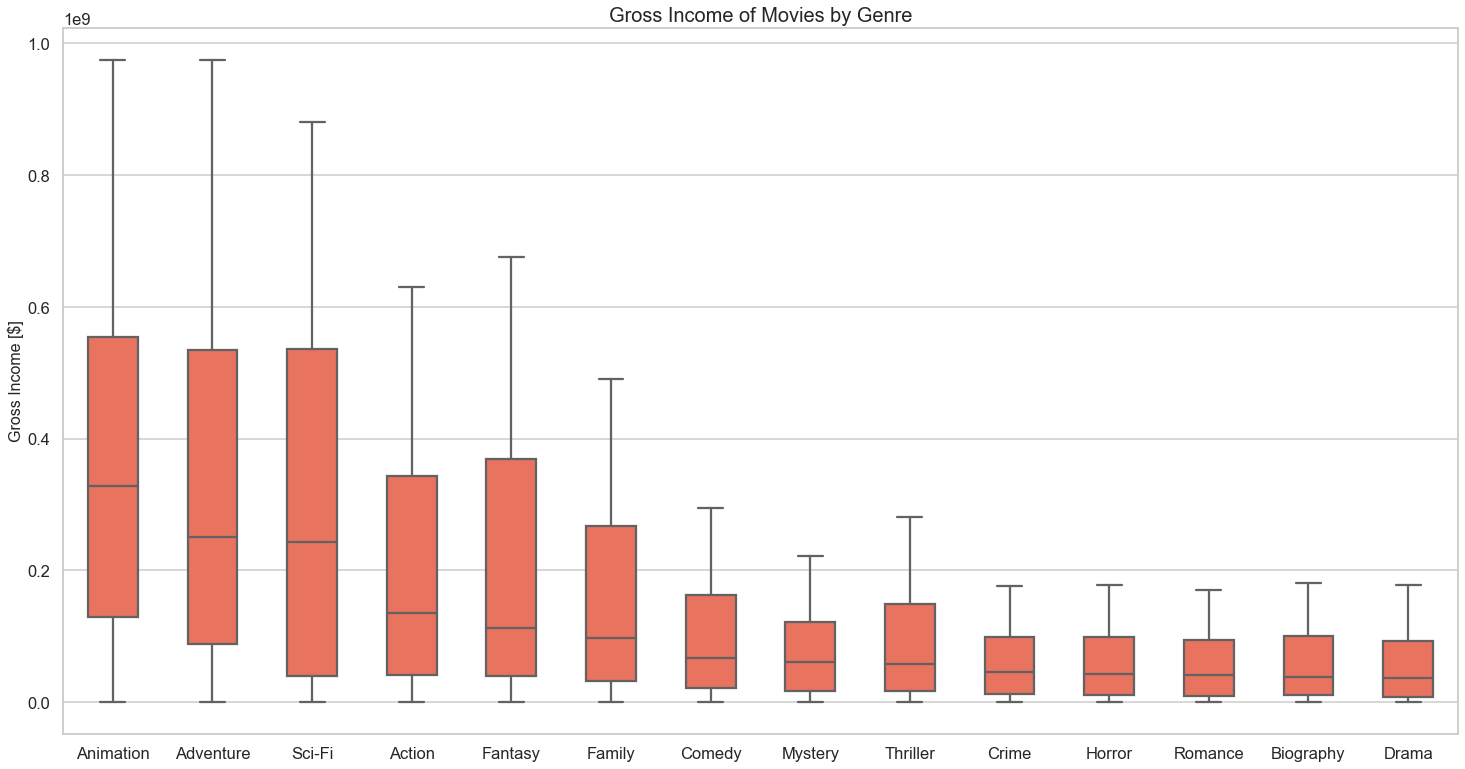

In [511]:
df = gross_incomes_by_genre_df

fig, ax = plt.subplots(figsize=(25,13))
ax = sns.boxplot(data=df[sorted(df.columns, key=lambda x: df[x].median(), reverse=True)],
                 width=0.5,
                 color='tomato',
                 showfliers=False,
                 whis=1)

ax.set_ylabel("Gross Income [$]", fontsize=16)
ax.set_title("Gross Income of Movies by Genre", fontsize=20)


##
---

## 1.3 - Visualizing the Correlation between *Genre* and *Net Income*


Text(0.5, 1.0, 'Net Income of Movies by Genre')

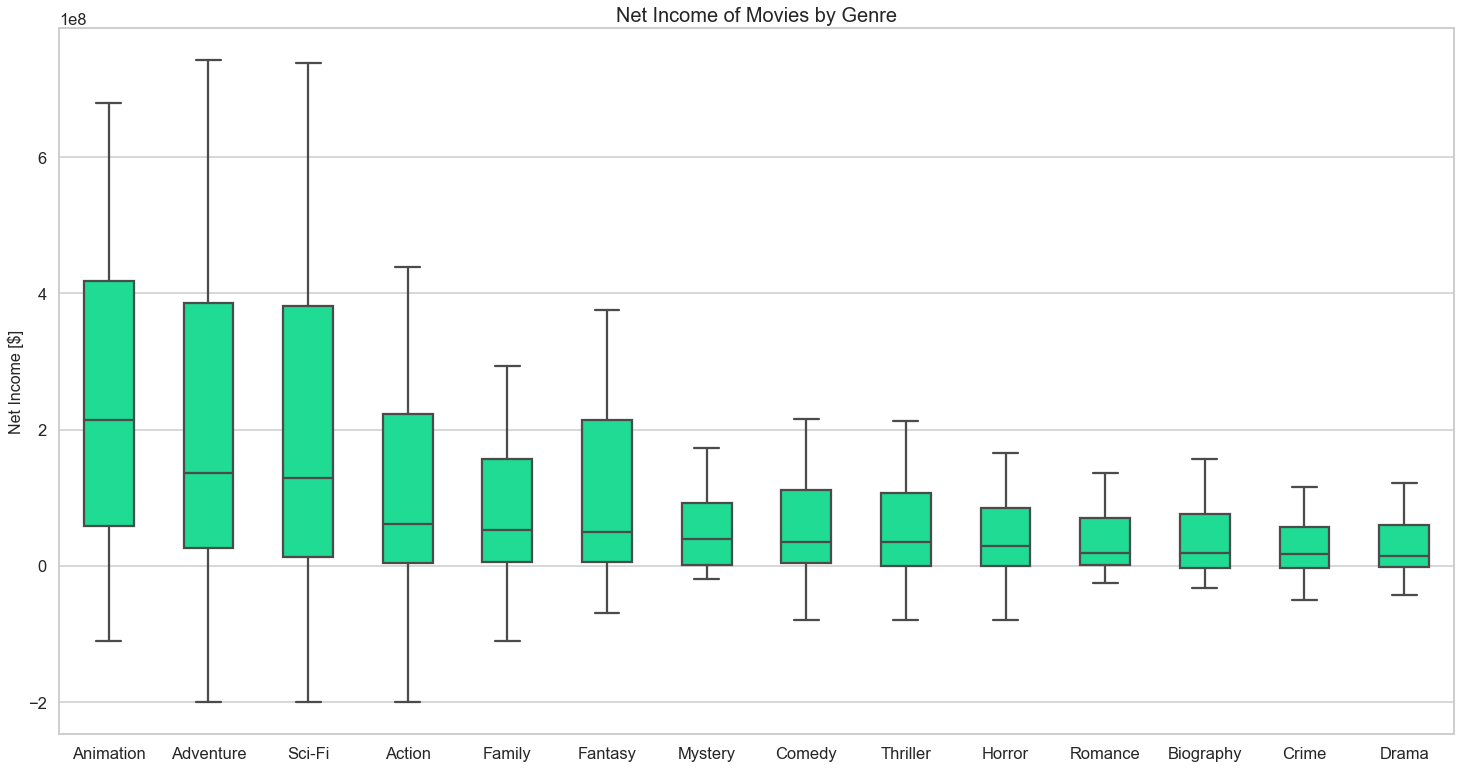

In [512]:
df = net_incomes_by_genre_df

fig, ax = plt.subplots(figsize=(25,13))
ax = sns.boxplot(data=df[sorted(df.columns, key=lambda x: df[x].median(), reverse=True)],
                 color='mediumspringgreen',
                 width=0.5,
                 showfliers=False,
                 whis=1)

ax.set_ylabel("Net Income [$]", fontsize=16)
ax.set_title("Net Income of Movies by Genre", fontsize=20)



##
---

## 1.4 - Visualizing the Correlation between *Genre* and *Cost-to-Income Ratio*


Text(0.5, 1.0, 'Cost-to-Income Ratio of Movies by Genre')

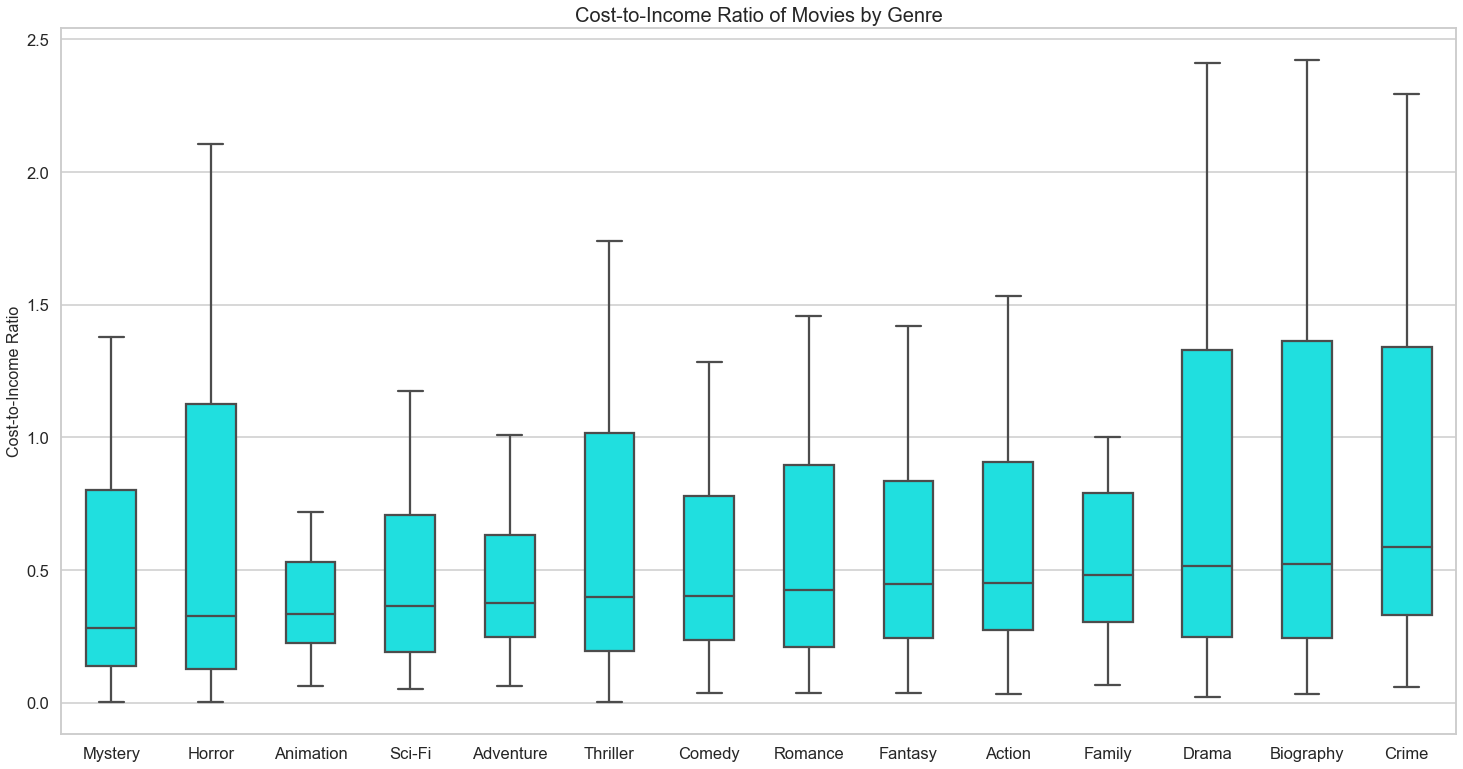

In [513]:
df = cost_income_ratios_by_genre_df

fig, ax = plt.subplots(figsize=(25,13))
ax = sns.boxplot(data=df[sorted(df.columns, key=lambda x: df[x].median())],
                 width=0.5,
                 color='aqua',
                 showfliers=False,
                 whis=1)

ax.set_ylabel("Cost-to-Income Ratio", fontsize=16)
ax.set_title("Cost-to-Income Ratio of Movies by Genre", fontsize=20)

##
---

# Question 2
## *Which genres of film have the highest ratings?* 

---

## 2.1 - Creating a Dataframe (`tmdb_rating_by_genre_df`) for the *TMDb Average Rating* by Genre

### 2.1.1 - Initialize `tmdb_rating_by_genre_df` by Appending Columns with the Associated *Genres* for each *Movie ID* to `id_to_tmdb_rating_map`

In [514]:
tmdb_rating_by_genre_df = id_to_tmdb_rating_map.join(id_to_genre_map, how='inner')

In [515]:
tmdb_rating_by_genre_df.head()

,average_rating,genre_1,genre_2,genre_3
movie_ID,,,,
tt0069049,7.0,Drama,None,None
tt0315642,6.6,Action,Crime,Drama
tt0326965,5.4,Drama,Mystery,Thriller
tt0337692,5.6,Adventure,Drama,Romance
tt0359950,7.1,Adventure,Comedy,Drama


### 2.1.2 - Convert `tmdb_rating_by_genre_df` to Long Format

In [516]:
tmdb_rating_by_genre_df = pd.melt(tmdb_rating_by_genre_df.reset_index(), id_vars=["movie_ID", "average_rating"])
tmdb_rating_by_genre_df.set_index("movie_ID", inplace=True)

In [517]:
tmdb_rating_by_genre_df.head(10)

,average_rating,variable,value
movie_ID,,,
tt0069049,7.0,genre_1,Drama
tt0315642,6.6,genre_1,Action
tt0326965,5.4,genre_1,Drama
tt0337692,5.6,genre_1,Adventure
tt0359950,7.1,genre_1,Adventure
tt0360556,5.4,genre_1,Drama
tt0365545,7.3,genre_1,Comedy
tt0365907,6.3,genre_1,Action
tt0369610,6.6,genre_1,Action


### 2.1.3 - Drop the `variable` Column and Rename the `value` Column to `genre`

In [518]:
tmdb_rating_by_genre_df.drop(columns="variable", inplace=True)
tmdb_rating_by_genre_df.rename(columns={"value": "genre"}, inplace=True)

In [519]:
tmdb_rating_by_genre_df.head(10)

,average_rating,genre
movie_ID,,
tt0069049,7.0,Drama
tt0315642,6.6,Action
tt0326965,5.4,Drama
tt0337692,5.6,Adventure
tt0359950,7.1,Adventure
tt0360556,5.4,Drama
tt0365545,7.3,Comedy
tt0365907,6.3,Action
tt0369610,6.6,Action


### 2.1.4 - Drop the Rows with a Null Value in the `genre` Column

In [520]:
tmdb_rating_by_genre_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 18639 entries, tt0069049 to tt9889072
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  18639 non-null  float64
 1   genre           14068 non-null  object 
dtypes: float64(1), object(1)
memory usage: 436.9+ KB


In [521]:
tmdb_rating_by_genre_df.dropna(inplace=True)

In [522]:
tmdb_rating_by_genre_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 14068 entries, tt0069049 to tt9495224
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  14068 non-null  float64
 1   genre           14068 non-null  object 
dtypes: float64(1), object(1)
memory usage: 329.7+ KB


### 2.1.5 - Group `tmdb_rating_by_genre_df` by *Genre* and View the Number of Data Points in each Group

In [523]:
tmdb_genre_counts = tmdb_rating_by_genre_df.groupby("genre").count()["average_rating"].sort_values(ascending=False)

In [524]:
tmdb_genre_counts

genre
Drama          2941
Comedy         1740
Thriller       1222
Action         1190
Horror         1082
Crime           816
Romance         733
Adventure       729
Documentary     720
Mystery         478
Biography       476
Sci-Fi          418
Fantasy         338
Animation       239
Family          237
History         202
Music           180
Sport           141
War              78
Musical          43
Western          39
News             24
Game-Show         1
Reality-TV        1
Name: average_rating, dtype: int64

### 2.1.6 - Drop Genres with an Unacceptably Small Number of Data Points

In [525]:
tmdb_acceptable_genres = tmdb_genre_counts.loc[lambda x: x>= 100].index

In [526]:
tmdb_acceptable_genres

Index(['Drama', 'Comedy', 'Thriller', 'Action', 'Horror', 'Crime', 'Romance',
       'Adventure', 'Documentary', 'Mystery', 'Biography', 'Sci-Fi', 'Fantasy',
       'Animation', 'Family', 'History', 'Music', 'Sport'],
      dtype='object', name='genre')

In [527]:
tmdb_rating_by_genre_df = tmdb_rating_by_genre_df.loc[tmdb_rating_by_genre_df["genre"].map(lambda x: x in tmdb_acceptable_genres)]

In [528]:
set(tmdb_rating_by_genre_df["genre"].unique()) == set(tmdb_acceptable_genres)

True

### 2.1.7 - Obtain the Mean Value of `average_rating` for Each Genre

In [529]:
tmdb_rating_by_genre_df = tmdb_rating_by_genre_df.groupby("genre").mean()["average_rating"].sort_values(ascending=False)

In [530]:
tmdb_rating_by_genre_df

genre
Documentary    6.947222
Biography      6.859664
Music          6.786667
History        6.701980
Sport          6.634043
Animation      6.509623
Romance        6.204638
Drama          6.201836
Adventure      6.054458
Family         6.011814
Crime          5.980515
Comedy         5.906092
Fantasy        5.826627
Mystery        5.768828
Action         5.756807
Sci-Fi         5.544737
Thriller       5.468576
Horror         5.053512
Name: average_rating, dtype: float64

##
---

## 2.2 - Visualizing the Correlation between *Genre* and *TMDb Average Rating* 

Text(0.5, 1.0, 'Mean $TMBd$ Rating by Genre')

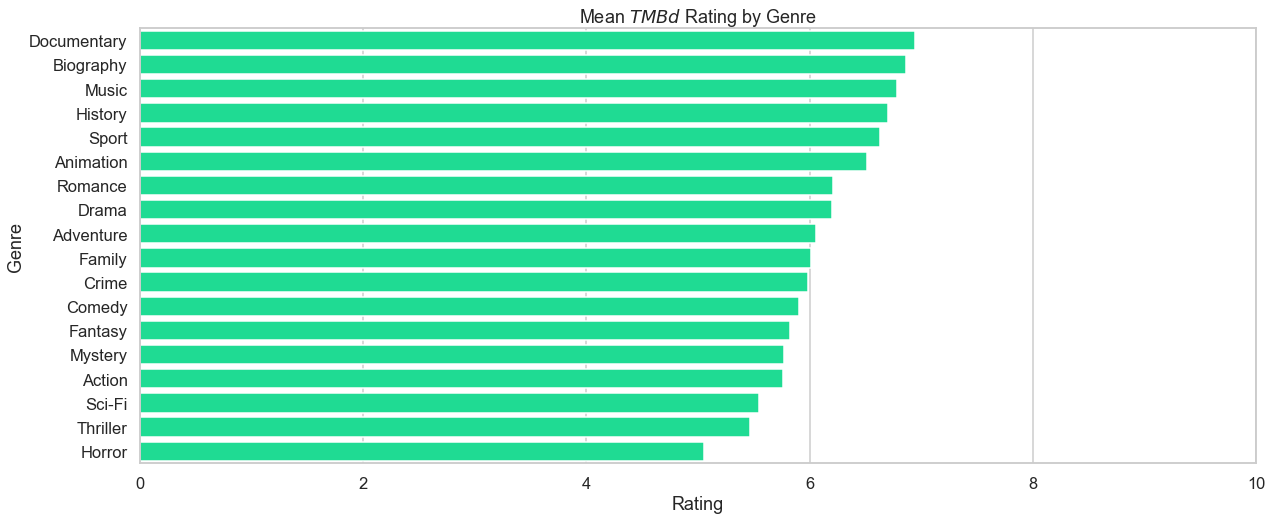

In [531]:
df = tmdb_rating_by_genre_df
sns.set_palette('dark')
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.barplot(x=df.values, 
                 y=df.index,
                 color='mediumspringgreen',
                 orient="h",
                 dodge=False)
ax.set_xlim(0,10)
ax.set_xlabel("Rating")
ax.set_ylabel("Genre")
ax.set_title("Mean $TMBd$ Rating by Genre")


##
---

## 2.3 - Creating a Dataframe (`imdb_rating_by_genre_df`) for the *IMDb Average Rating* by Genre

### 2.3.1 - Initialize `imdb_rating_by_genre_df` by Appending Columns with the Associated *Genres* for each *Movie ID* 

In [532]:
imdb_rating_by_genre_df = id_to_imdb_rating_map.join(id_to_genre_map, how='inner')

In [533]:
imdb_rating_by_genre_df.head()

,average_rating,genre_1,genre_2,genre_3
movie_ID,,,,
tt10356526,8.3,Romance,None,None
tt10384606,8.9,Documentary,None,None
tt1042974,6.4,Drama,None,None
tt1043726,4.2,Action,Adventure,Fantasy
tt1060240,6.5,Mystery,Thriller,None


### 2.3.2 - Convert `imdb_rating_by_genre_df` to Long Format

In [534]:
imdb_rating_by_genre_df = pd.melt(imdb_rating_by_genre_df.reset_index(), id_vars=["movie_ID", "average_rating"])
imdb_rating_by_genre_df.set_index("movie_ID", inplace=True)

In [535]:
imdb_rating_by_genre_df.head(10)

,average_rating,variable,value
movie_ID,,,
tt10356526,8.3,genre_1,Romance
tt10384606,8.9,genre_1,Documentary
tt1042974,6.4,genre_1,Drama
tt1043726,4.2,genre_1,Action
tt1060240,6.5,genre_1,Mystery
tt1069246,6.2,genre_1,Comedy
tt1094666,7.0,genre_1,Biography
tt1130982,6.4,genre_1,Drama
tt1156528,7.2,genre_1,Drama


### 2.3.3 - Drop the `variable` Column and Rename the `value` Column to `genre`

In [536]:
imdb_rating_by_genre_df.drop(columns="variable", inplace=True)
imdb_rating_by_genre_df.rename(columns={"value": "genre"}, inplace=True)

In [537]:
imdb_rating_by_genre_df.head(10)

,average_rating,genre
movie_ID,,
tt10356526,8.3,Romance
tt10384606,8.9,Documentary
tt1042974,6.4,Drama
tt1043726,4.2,Action
tt1060240,6.5,Mystery
tt1069246,6.2,Comedy
tt1094666,7.0,Biography
tt1130982,6.4,Drama
tt1156528,7.2,Drama


### 2.3.4 - Drop the Rows with a Null Value in the `genre` Column

In [538]:
imdb_rating_by_genre_df.dropna(inplace=True)

In [539]:
imdb_rating_by_genre_df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 110029 entries, tt10356526 to tt9844256
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   average_rating  110029 non-null  float64
 1   genre           110029 non-null  object 
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


### 2.3.5 - Group `imdb_rating_by_genre_df` by *Genre* and View the Number of Data Points for each Group

In [540]:
genre_counts = imdb_rating_by_genre_df.groupby("genre").count()["average_rating"].sort_values(ascending=False)

In [541]:
genre_counts

genre
Drama          26761
Comedy         15436
Documentary    12850
Thriller        7440
Horror          6842
Action          6262
Romance         5941
Crime           4159
Adventure       3361
Biography       3089
Family          2891
Mystery         2703
History         2260
Sci-Fi          1980
Fantasy         1872
Music           1625
Animation       1571
Sport            987
War              717
Musical          587
News             436
Western          244
Reality-TV        12
Adult              2
Game-Show          1
Name: average_rating, dtype: int64

### 2.3.6 - Drop Genres that Are Not In `tmdb_acceptable_genres`

In [542]:
imdb_rating_by_genre_df = imdb_rating_by_genre_df.loc[imdb_rating_by_genre_df["genre"].map(lambda x: x in tmdb_acceptable_genres)]

In [543]:
set(imdb_rating_by_genre_df["genre"].unique()) == set(tmdb_acceptable_genres)

True

### 2.3.7 - Obtain the Mean Value of `average_rating` for Each Genre

In [544]:
imdb_rating_by_genre_df = imdb_rating_by_genre_df.groupby("genre").mean()["average_rating"].sort_values(ascending=False)

In [545]:
imdb_rating_by_genre_df

genre
Documentary    7.303751
Biography      7.107737
Music          7.020369
History        6.977788
Sport          6.883587
Drama          6.342678
Family         6.302871
Animation      6.243666
Romance        6.110066
Adventure      6.098631
Crime          6.065497
Comedy         5.925434
Mystery        5.837551
Fantasy        5.828205
Action         5.739604
Thriller       5.573374
Sci-Fi         5.404949
Horror         4.934142
Name: average_rating, dtype: float64

##
---

## 2.4 - Visualizing the Correlation between *Genre* and *IMDb Average Rating* 

Text(0.5, 1.0, 'Mean $IMBd$ Rating by Genre')

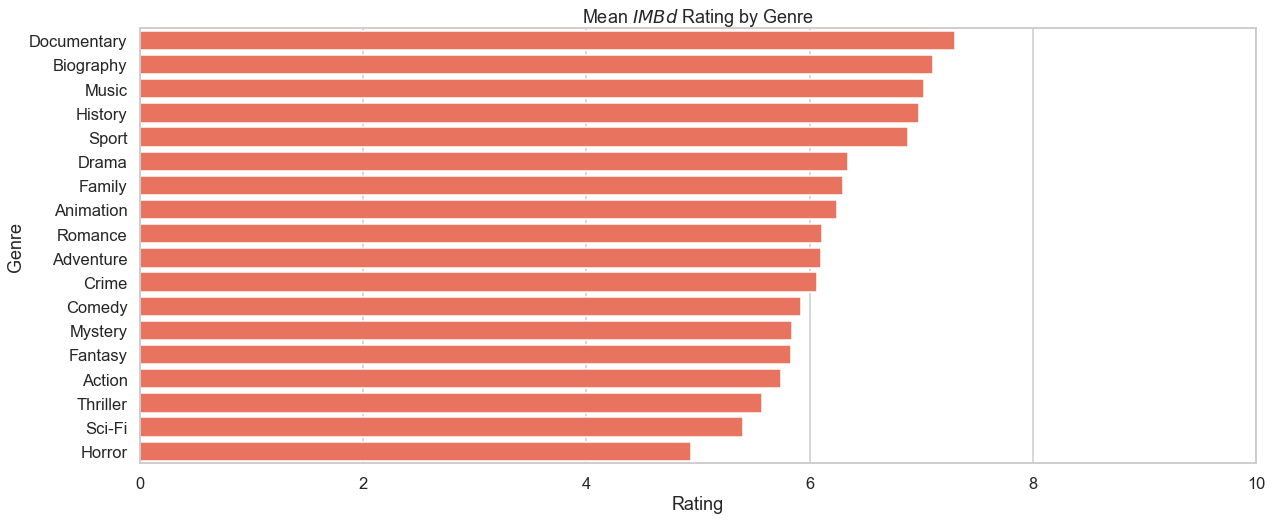

In [546]:
df = imdb_rating_by_genre_df

fig, ax = plt.subplots(figsize=(20,8))
ax = sns.barplot(x=df.values, 
                 y=df.index,
                 color='tomato',
                 orient="h",
                 dodge=False)
ax.set_xlim(0,10)
ax.set_xlabel("Rating")
ax.set_ylabel("Genre")
ax.set_title("Mean $IMBd$ Rating by Genre")

##
---

# Question 3 
## *Does a film's financial performance and/or ratings depend on its production budget?*

##
---

## 3.1 - Merging `id_to_financials_map` + `id_to_tmdb_rating_map` + `id_to_imdb_rating_map` into a Single DataFrame

In [547]:
budget_correlations_df = id_to_financials_map.join(id_to_tmdb_rating_map, how="inner").join(id_to_imdb_rating_map, how="inner", lsuffix="_tmdb", rsuffix="_imdb").drop(columns="cost_income_ratio")

In [548]:
budget_correlations_df.head()

,production_budget,gross_income,net_income,cost_income_ratio,average_rating_tmdb,average_rating_imdb
movie_ID,,,,,,
tt0359950,91000000,187861183,96861183,0.484400,7.1,7.3
tt0365907,28000000,62108587,34108587,0.450823,6.3,6.5
tt0369610,215000000,1648854864,1433854864,0.130394,6.6,7.0
tt0376136,45000000,21544732,-23455268,2.088678,5.7,6.2
tt0383010,30000000,54052249,24052249,0.555019,5.1,5.1


##
---

## 3.2 - Visualizing the Correlations between *Production Budget* and Performance

In [550]:
corr_coefficients = budget_correlations_df.corr()["production_budget"]

In [551]:
corr_coefficients

production_budget      1.000000
gross_income           0.784298
net_income             0.662642
cost_income_ratio     -0.037128
average_rating_tmdb    0.142422
average_rating_imdb    0.186633
Name: production_budget, dtype: float64

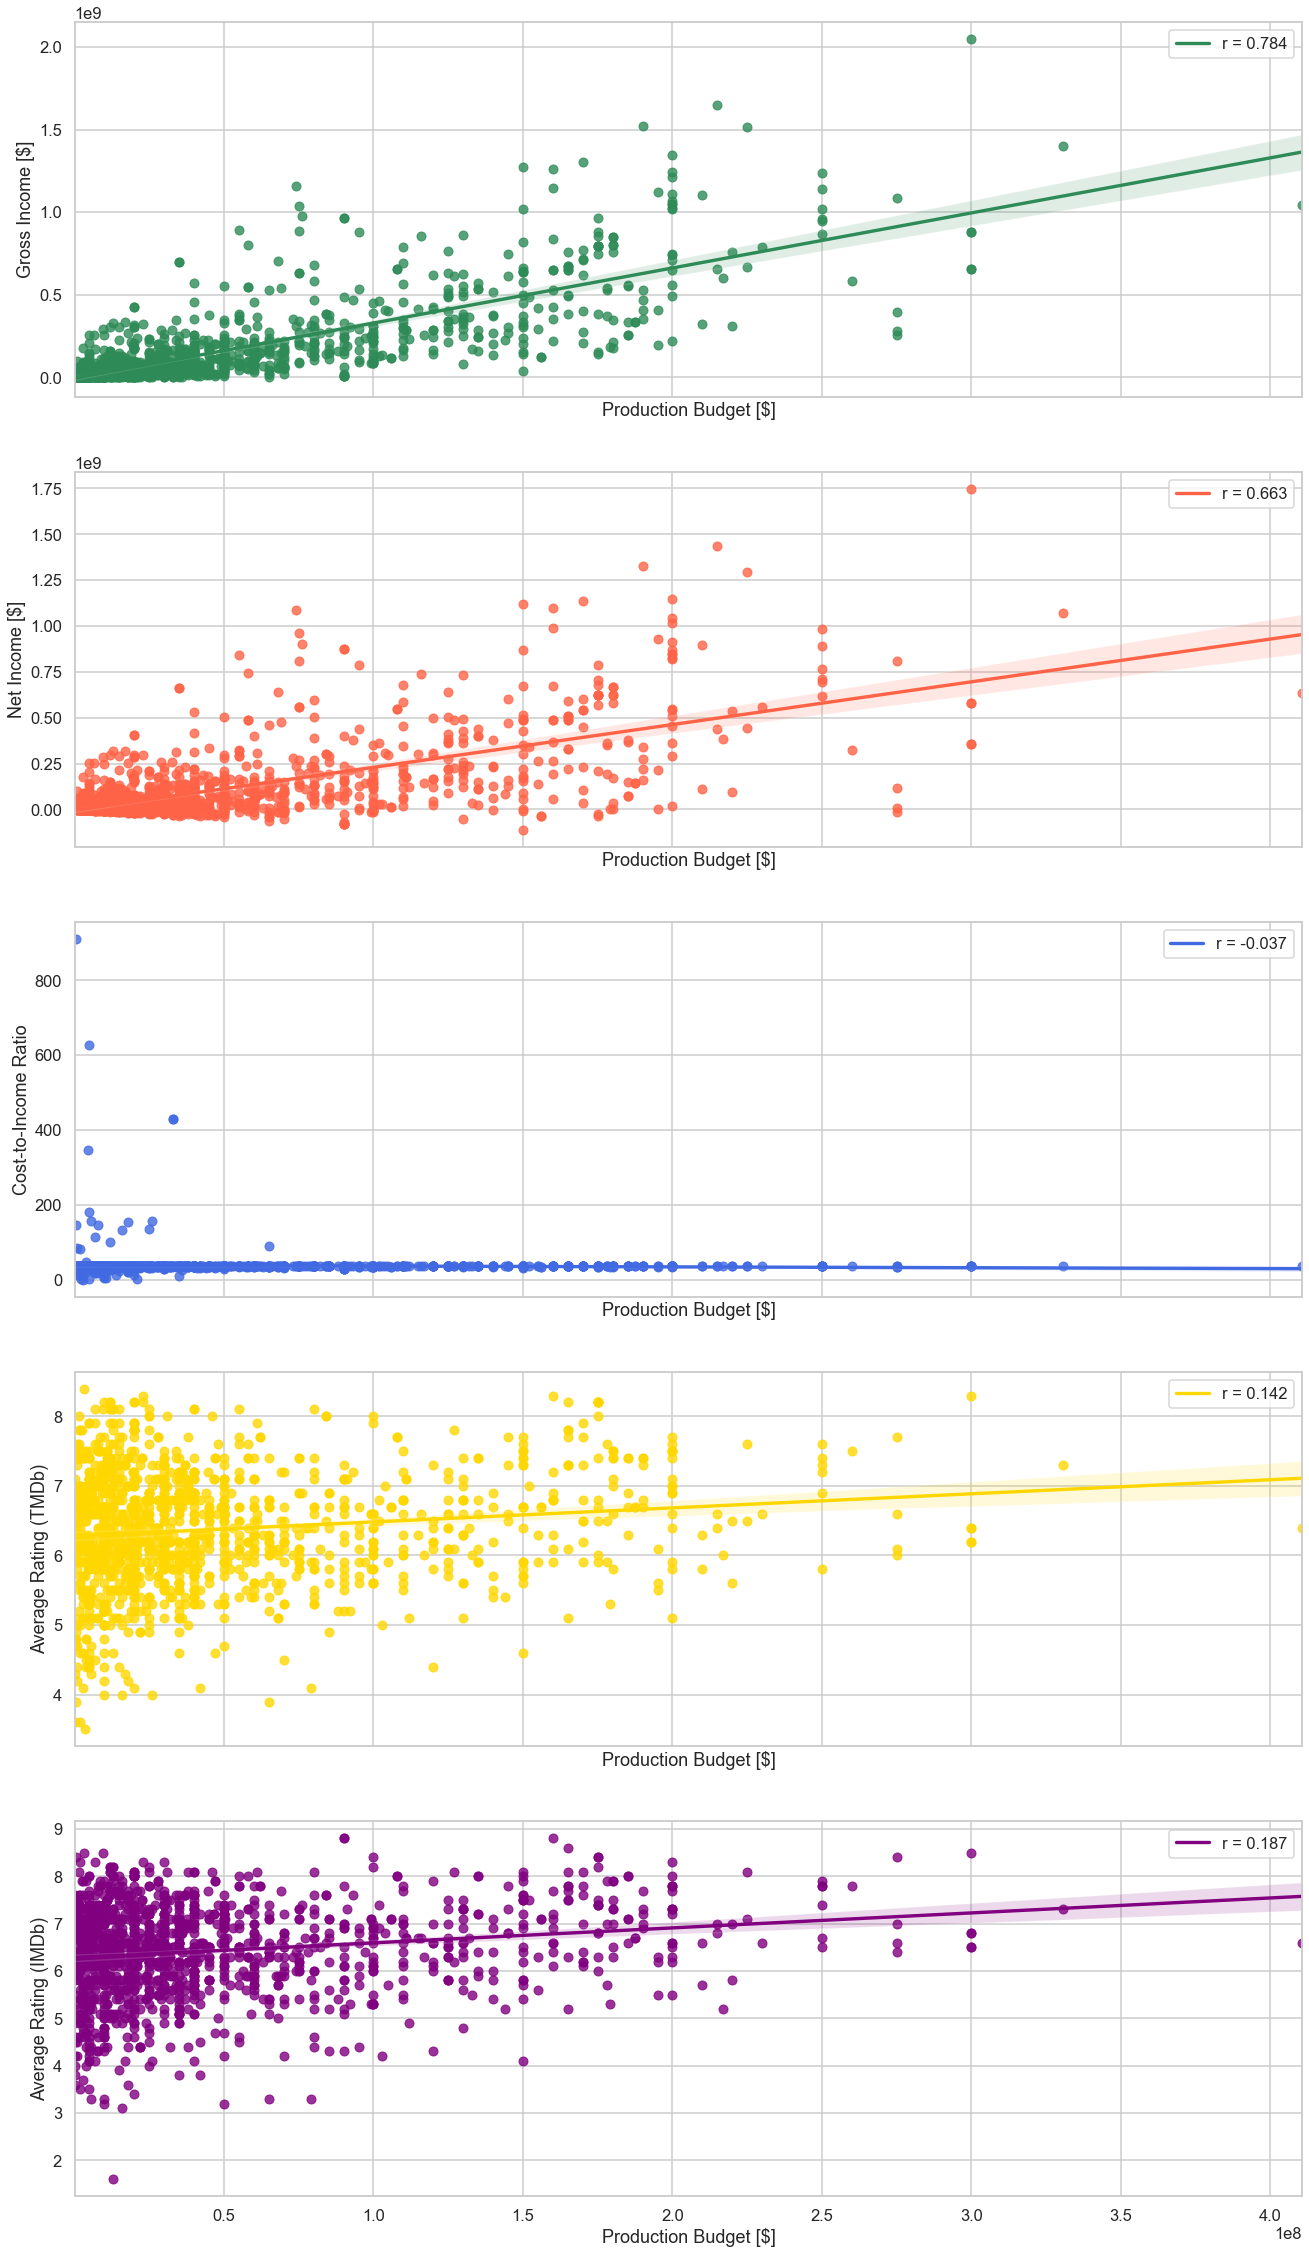

In [552]:
df = budget_correlations_df
fig, axes = plt.subplots(ncols=1, nrows=4, figsize=(22,40), sharex=True)

colors = ["seagreen", "tomato", "royalblue", "gold"]
ylabels = ["Gross Income [$]", "Net Income [$]", "Average Rating (TMDb)", "Average Rating (IMDb)"]

for n, feature in enumerate(df.columns[1:]):
    sns.regplot(x="production_budget",
                    y=feature,
                    data=df,
                    color=colors[n],
                    ax=axes[n])
    
    axes[n].set_xlabel("Production Budget [$]")
    axes[n].set_ylabel(ylabels[n])
    axes[n].legend(labels=[f"r = {corr_coefficients[n+1]:.3f}"])


##
---

# Results

## *Question 1*

With respect to gross income and net income, animated movies clearly perform best, followed by adventure and sci-fi films, as their median net incomes are significantly higher than the rest of the genres. These distributions have more spread than all other genres, and so their medians are less representative as a measure of central tendency. However, the majority of data within their IQR's lies above the median net income of all other genres, making them the most profitable. This finding is highlighted in the boxplot depicting the relationship between net income and genre, as shown below:

![figure1](./images/net_income_by_genre.png)

In terms of cost-to-income rato, mystery and horror films perform best. It follows that, for films with smaller production budgets and gross incomes, mystery and horror films perform best in terms of income per dollar spent on production. Followed closely behind these two are animation, sci-fi, and adventure films, providing further evidence that films of these genres are the most profitable. These findings are highlighted in the boxplot depicting the relationship between cost-to-income ratio and genre, as shown below:

![figure4](./images/cost_income_ratio_by_genre.png)

##
---

## *Question 2*

With respect to rating, the highest performers are documentaries, in addition to biographies and films related to music, history, and sports. This is true for both the *IMDb* and *TMDb*  mean ratings, as their distribution are strikingly similar. However, these genres do not overlap at all with the highest financial performers discussed above. This finding is highlighted in the bar graphs depicting the relationship between genre and mean *IMDb* and *TMDb* rating, as shown below:

![figure2](./images/imdb_rating_by_genre.png)

![figure4](./images/tmdb_rating_by_genre.png)

##
---

## *Question 3*

A film's production budget correlates strongly with gross income and net income, meaning that the profitability of a movie is likely to increase as the amount of money allocated for its production increases, and vice versa. Surprisingly, rating shows a weak correlation with production budget. This implies that increasing the budget for movie production, although likely to increase profit, does not ensure that viewers will enjoy the film itself. These findings are highlighted in the regression plots depicting the relationship between budget and performance, as shown below:

![figure3](./images/budget_correlations_with_performance.png)

##
---

# Conclusions

Given a large production budget, the best choices to consider for movie genre, financially, are animation, adventure, and sci-fi movies since they have the highest median gross incomes and median net incomes among all genres. Given a smaller production budget, mystery and horror films are the most likely to perform the best financially, with the lowest cost-to-income ratios among all genres. 

In terms of audience enjoyment, documentaries, along with biographies, music-related movies, historical movies, and sports-related movies recieve the highest ratings. However, none of these genres are high-performers financially, and so are not good choices in terms of profit. 

Finally, production budget should be regarded as a major factor when producing a film. It shows strong correlation with gross income and net income.

##
---

# Limitations & Ideas for Further Analysis

This limitations of this analysis stem mainly from the datasets themselves. The dataset containing financial information had data for only around 5,000 films, however, due to the nature of the analysis, only about 1,500 movies were able to used in the analysis. Also, production budgets and incomes, as reported by movie production agencies, are notorious for being exegerrated, and so some of this data is not reliable. Gross incomes and production budgets of a wider variety of films should therefore be collected. Further analysis should focus specifically on films that were financially successful, in order to search for, and gain insight into, the factors that led to this success. For example, determining which directors, writers, and actors are most  involved in these financially high-performing films. Another idea for analysis could involve classifying the tropes (i.e. the manner in which certain characters, settings, and situations are used in a given genre) that correlate the most highly with financial success.

Additionally, financial performance did not correlate with *TMDb* and *IMDb* ratings, which rendered these ratings ineffective as a measure of performance. The correlation between ratings from other sources and financial performance should be investigated more thoroughly because it is impractical to rely solely on financial data as an indicator of success. For example, ratings from *Rotten Tomatoes* could be investigated as a potential metric for performance.